# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units="metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

    #https://api.openweathermap.org/data/2.5/weather?q=dukat&appid=

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()# YOUR CODE HERE
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | ferme-neuve
Processing Record 3 of Set 1 | santo domingo
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | fairbanks
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | san patricio
Processing Record 14 of Set 1 | provideniya
Processing Record 15 of Set 1 | lavrentiya
Processing Record 16 of Set 1 | lima
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | fortuna
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | tapaua
City not found. Skipping...
Processing Record 

Processing Record 35 of Set 4 | honiara
Processing Record 36 of Set 4 | luanda
Processing Record 37 of Set 4 | ribeira grande
Processing Record 38 of Set 4 | mbandaka
Processing Record 39 of Set 4 | mwanza
Processing Record 40 of Set 4 | alto parana
Processing Record 41 of Set 4 | dibulla
Processing Record 42 of Set 4 | lagoa
Processing Record 43 of Set 4 | zhigansk
Processing Record 44 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 45 of Set 4 | blackwater
Processing Record 46 of Set 4 | nanortalik
Processing Record 47 of Set 4 | vestmannaeyjar
Processing Record 48 of Set 4 | palmer
Processing Record 49 of Set 4 | mahebourg
Processing Record 0 of Set 5 | castro
Processing Record 1 of Set 5 | dunedin
Processing Record 2 of Set 5 | gizo
Processing Record 3 of Set 5 | kitama
Processing Record 4 of Set 5 | altamira
Processing Record 5 of Set 5 | esperance
Processing Record 6 of Set 5 | lorengau
Processing Record 7 of Set 5 | byron bay
Processing Record 8 of Set 5 | h

Processing Record 24 of Set 8 | codrington
Processing Record 25 of Set 8 | ampanihy
Processing Record 26 of Set 8 | jember
Processing Record 27 of Set 8 | bandarbeyla
Processing Record 28 of Set 8 | pevek
Processing Record 29 of Set 8 | college
Processing Record 30 of Set 8 | whyalla
Processing Record 31 of Set 8 | aksu
Processing Record 32 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 33 of Set 8 | chita
Processing Record 34 of Set 8 | charlestown
Processing Record 35 of Set 8 | suhbaatar
Processing Record 36 of Set 8 | suraabad
Processing Record 37 of Set 8 | fare
Processing Record 38 of Set 8 | georgetown
Processing Record 39 of Set 8 | aguimes
Processing Record 40 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 41 of Set 8 | karratha
Processing Record 42 of Set 8 | vila franca do campo
Processing Record 43 of Set 8 | saint-augustin
Processing Record 44 of Set 8 | temaraia
City not found. Skipping...
Processing Record 45 of Set 8 | primorsk
Proce

Processing Record 14 of Set 12 | isiolo
Processing Record 15 of Set 12 | poum
Processing Record 16 of Set 12 | meulaboh
Processing Record 17 of Set 12 | sechura
Processing Record 18 of Set 12 | haines junction
Processing Record 19 of Set 12 | puli
Processing Record 20 of Set 12 | wewak
Processing Record 21 of Set 12 | malanje
Processing Record 22 of Set 12 | bousso
Processing Record 23 of Set 12 | fort nelson
Processing Record 24 of Set 12 | buta
Processing Record 25 of Set 12 | yanam
Processing Record 26 of Set 12 | jiddah
City not found. Skipping...
Processing Record 27 of Set 12 | kedrovyy
Processing Record 28 of Set 12 | suoyarvi
Processing Record 29 of Set 12 | vyartsilya
Processing Record 30 of Set 12 | nongan
Processing Record 31 of Set 12 | kuche
City not found. Skipping...
Processing Record 32 of Set 12 | chinsali
Processing Record 33 of Set 12 | puerto colombia
Processing Record 34 of Set 12 | ayan
Processing Record 35 of Set 12 | mao
Processing Record 36 of Set 12 | qaracala

In [6]:
#city_data

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [8]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,28.18,71,57,3.27,MV,1681426809
1,Ferme-Neuve,46.7001,-75.4493,12.40,91,84,3.44,CA,1681426809
2,Santo Domingo,18.5001,-69.9886,28.82,80,20,4.12,DO,1681426309
3,Butaritari,3.0707,172.7902,27.46,79,39,5.30,KI,1681426810
4,Mataura,-46.1927,168.8643,15.80,68,25,3.76,NZ,1681426810
5,Fairbanks,64.8378,-147.7164,-5.51,60,40,2.57,US,1681426547
6,Punta Arenas,-53.1500,-70.9167,5.06,70,0,2.06,CL,1681426576
7,Upernavik,72.7868,-56.1549,-10.87,92,100,2.55,GL,1681426829
8,Chokurdakh,70.6333,147.9167,-12.92,89,100,3.40,RU,1681426836
9,Jamestown,42.0970,-79.2353,24.80,33,0,5.14,US,1681426811


In [9]:
# convert unix timestamp to date,time
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit = "s")

In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Hithadhoo,-0.6000,73.0833,28.18,71,57,3.27,MV,2023-04-13 23:00:09
1,Ferme-Neuve,46.7001,-75.4493,12.40,91,84,3.44,CA,2023-04-13 23:00:09
2,Santo Domingo,18.5001,-69.9886,28.82,80,20,4.12,DO,2023-04-13 22:51:49
3,Butaritari,3.0707,172.7902,27.46,79,39,5.30,KI,2023-04-13 23:00:10
4,Mataura,-46.1927,168.8643,15.80,68,25,3.76,NZ,2023-04-13 23:00:10


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

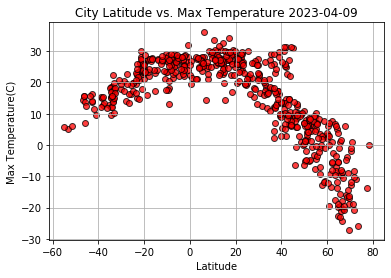

In [12]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title("City Latitude vs. Max Temperature 2023-04-09")
plt.ylabel('Max Temperature(C)')
plt.xlabel('Latitude')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

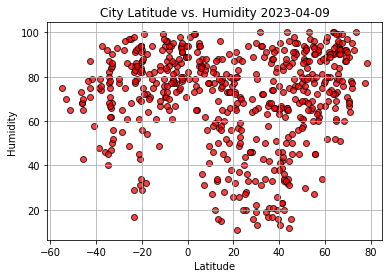

In [13]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title("City Latitude vs. Humidity 2023-04-09")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

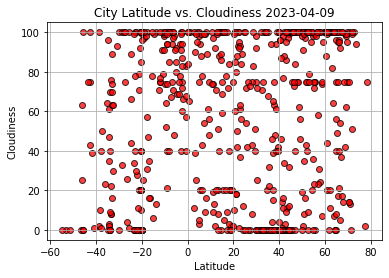

In [14]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(city_data_df['Lat'], city_data_df["Cloudiness"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title("City Latitude vs. Cloudiness 2023-04-09")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

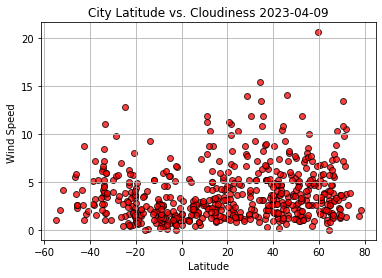

In [15]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title("City Latitude vs. Cloudiness 2023-04-09")
plt.ylabel('Wind Speed ')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

#                  (x - based on to predict #y - to predict) predict temp bssed on latitude
#slop,intercept, rvalue, pvalue = stats.linregress(weather['lat'], weather['temp'])
def create_linear_plots(lat, yvalue,x,y):
    slope, intercept, rvalue, pvalue, stderr = linregress(lat, yvalue)
    #slope and intercept are defined
    y_prd= slope*lat+ intercept 
    plt.plot(lat, y_prd, color="red")
    eq="y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(eq, xy=(x,y),color="red", fontsize=18)
    #Scatter plot and a line
    #city_data_df.plot(kind = "scatter", x="lat", y="y", marker="o")
    print("The r-value is: ",rvalue**2)
    plt.scatter(lat, yvalue)
    plt.ylabel(yvalue.name)
    plt.xlabel('Latitude')
    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df= city_data_df.loc[(city_data_df['Lat']>=0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Ferme-Neuve,46.7001,-75.4493,12.40,91,84,3.44,CA,2023-04-13 23:00:09
2,Santo Domingo,18.5001,-69.9886,28.82,80,20,4.12,DO,2023-04-13 22:51:49
3,Butaritari,3.0707,172.7902,27.46,79,39,5.30,KI,2023-04-13 23:00:10
5,Fairbanks,64.8378,-147.7164,-5.51,60,40,2.57,US,2023-04-13 22:55:47
7,Upernavik,72.7868,-56.1549,-10.87,92,100,2.55,GL,2023-04-13 23:00:29


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']<0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Hithadhoo,-0.6000,73.0833,28.18,71,57,3.27,MV,2023-04-13 23:00:09
4,Mataura,-46.1927,168.8643,15.80,68,25,3.76,NZ,2023-04-13 23:00:10
6,Punta Arenas,-53.1500,-70.9167,5.06,70,0,2.06,CL,2023-04-13 22:56:16
13,Lima,-12.0432,-77.0282,27.17,67,75,5.14,PE,2023-04-13 22:59:15
14,Ushuaia,-54.8000,-68.3000,5.81,75,0,1.03,AR,2023-04-13 23:00:47


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:  0.7495604994390311


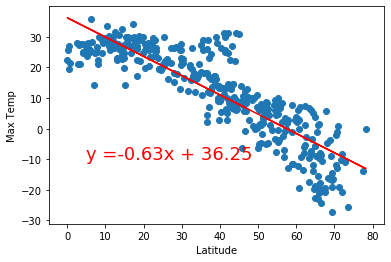

In [19]:
# Linear regression on Northern Hemisphere
lat = northern_hemi_df["Lat"]
yvalue = northern_hemi_df["Max Temp"]
create_linear_plots(lat, yvalue,5,-10)

In [2]:
# Linear regression on Southern Hemisphere
lat = southern_hemi_df["Lat"]
yvalue = southern_hemi_df["Max Temp"]
create_linear_plots(lat, yvalue,-30,5)

NameError: name 'southern_hemi_df' is not defined

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is:  0.04137004613662161


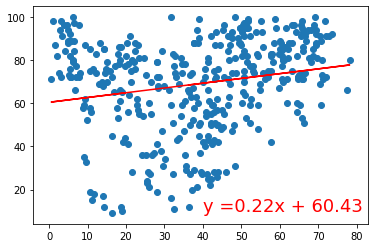

In [35]:
# Northern Hemisphere
lat = northern_hemi_df["Lat"]
yvalue = northern_hemi_df["Humidity"]
create_linear_plots(lat, yvalue,40,10)

The r-value is:  0.05853830168035259


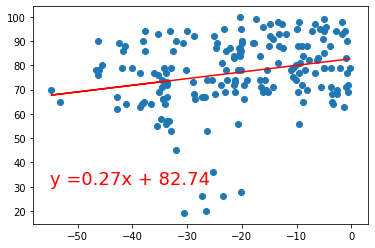

In [43]:
# Southern Hemisphere
lat = southern_hemi_df["Lat"]
yvalue = southern_hemi_df["Humidity"]
create_linear_plots(lat, yvalue,-55,31)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:  0.016430212328093483


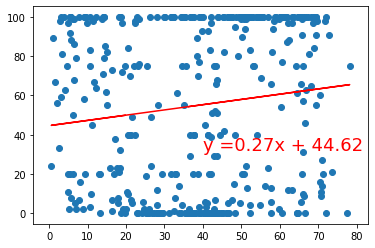

In [38]:
# Northern Hemisphere
lat = northern_hemi_df["Lat"]
yvalue = northern_hemi_df["Cloudiness"]
create_linear_plots(lat, yvalue,40,32)

The r-value is:  0.03267703094520111


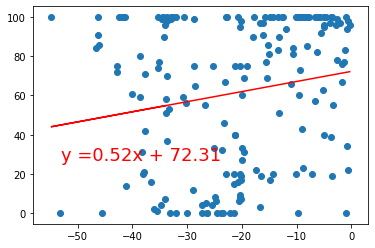

In [45]:
# Southern Hemisphere
lat = southern_hemi_df["Lat"]
yvalue = southern_hemi_df["Cloudiness"]
create_linear_plots(lat, yvalue,-53,27)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:  0.020906050278235274


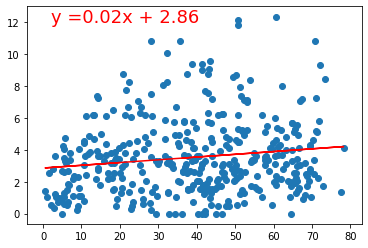

In [41]:
# Northern Hemisphere
lat = northern_hemi_df["Lat"]
yvalue = northern_hemi_df["Wind Speed"]
create_linear_plots(lat, yvalue,2,12)

The r-value is:  0.0858072528104002


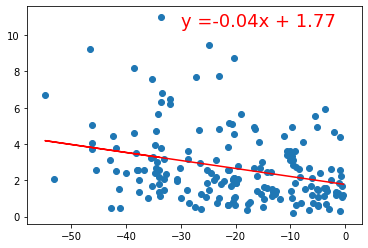

In [48]:
# Southern Hemisphere
lat = southern_hemi_df["Lat"]
yvalue = southern_hemi_df["Wind Speed"]
create_linear_plots(lat, yvalue,-30,10.5)

**Discussion about the linear relationship:** YOUR RESPONSE HERE